# Incubadora de Aplicaciones
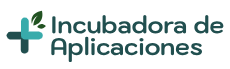

Clusterización de cargas de trabajo en la nube según su estado de salud.

<br>**Integrantes:**
- Federico Ocampo Ortiz - github.com/00Fede
- Edgar Hernando Guerrero Olago - github.com/eguerrer2023
- Daniel Antonio Patiño Fernandez - github.com/ddnny73

# Análisis y Preprocesamiento de Datos

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

### Carga de dataset

In [90]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 8))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=50,ax=ax, facecolor='midnightblue', edgecolor='black')
        title_obj = ax.set_title(var_name+" Distribution")
        plt.setp(title_obj, color='black')                     # Individual title colours.

        # remove grid lines
        ax.grid(False)

        ax.xaxis.label.set_color('black')  
        ax.yaxis.label.set_color('black')          
        ax.tick_params(axis='x', colors='black')       #set the color of xticks
        ax.tick_params(axis='y', colors='black')       #set the color of yticks
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [91]:
# Paso 1 - Creadondo data set de prueba
df = pd.read_csv("data/fact_application_full.csv")
df.head()

,application_id,organization_id,provider_id,snapshot_date_id,applicationcode,fullresourcescount,devresourcescount,qaresourcescount,pdnresourcescount,fullaccountscount,...,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,ppn_tm,pdnresourcessize,clasification
0,59,1,1,20231021,app00059,29,18,4,7,5,...,0.429,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.845,Red
1,625,1,1,20231021,app00625,28,24,1,3,4,...,0.333,0.000,0.333,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.477,Red
2,324,1,1,20231021,app00324,9,1,2,6,3,...,0.667,0.000,0.333,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.778,Red
3,736,1,1,20231021,app00736,6,3,0,3,3,...,0.333,0.000,0.000,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,0.477,Red
4,785,1,1,20231021,app00785,363,49,163,151,3,...,0.344,0.371,0.007,0.0,0.0,0.0,0.0,2023-10-21 01:04:53.696000,2.179,Red


# Análisis Exploratorio de Datos

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   application_id                      912 non-null    int64  
 1   organization_id                     912 non-null    int64  
 2   provider_id                         912 non-null    int64  
 3   snapshot_date_id                    912 non-null    int64  
 4   applicationcode                     912 non-null    object 
 5   fullresourcescount                  912 non-null    int64  
 6   devresourcescount                   912 non-null    int64  
 7   qaresourcescount                    912 non-null    int64  
 8   pdnresourcescount                   912 non-null    int64  
 9   fullaccountscount                   912 non-null    int64  
 10  devaccountscount                    912 non-null    int64  
 11  qaaccountscount                     912 non-n

In [5]:
df.describe()

,application_id,organization_id,provider_id,snapshot_date_id,fullresourcescount,devresourcescount,qaresourcescount,pdnresourcescount,fullaccountscount,devaccountscount,...,yellowcostoptimizingresourcescount,redsecuritydensity,yellowsecuritydensity,redfaulttolerancedensity,yellowfaulttolerancedensity,redperformancedensity,yellowperformancedensity,redcostoptimizingdensity,yellowcostoptimizingdensity,pdnresourcessize
count,912.000000,912.0,912.0,912.0,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,682.000000
mean,456.876096,1.0,1.0,20231021.0,263.184211,96.344298,70.880482,95.959430,6.389254,2.373904,...,0.121711,0.021755,0.069363,0.003935,0.034874,0.000020,0.004151,0.000014,0.000389,1.553886
std,263.906727,0.0,0.0,0.0,1254.604117,473.100976,355.346095,433.181744,22.494561,8.709326,...,1.373055,0.074807,0.125865,0.026768,0.082806,0.000424,0.016329,0.000370,0.003708,0.732243
min,1.000000,1.0,1.0,20231021.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,228.750000,1.0,1.0,20231021.0,9.000000,4.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.079000
50%,456.500000,1.0,1.0,20231021.0,74.000000,27.500000,15.000000,22.500000,3.000000,1.000000,...,0.000000,0.000000,0.022500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.740000
75%,685.250000,1.0,1.0,20231021.0,221.000000,77.000000,55.000000,84.000000,4.000000,1.000000,...,0.000000,0.014250,0.078250,0.000000,0.039000,0.000000,0.000000,0.000000,0.000000,2.036000
max,914.000000,1.0,1.0,20231021.0,27149.000000,10403.000000,7377.000000,9369.000000,177.000000,70.000000,...,26.000000,1.000000,1.000000,0.500000,1.000000,0.010000,0.250000,0.011000,0.061000,3.972000


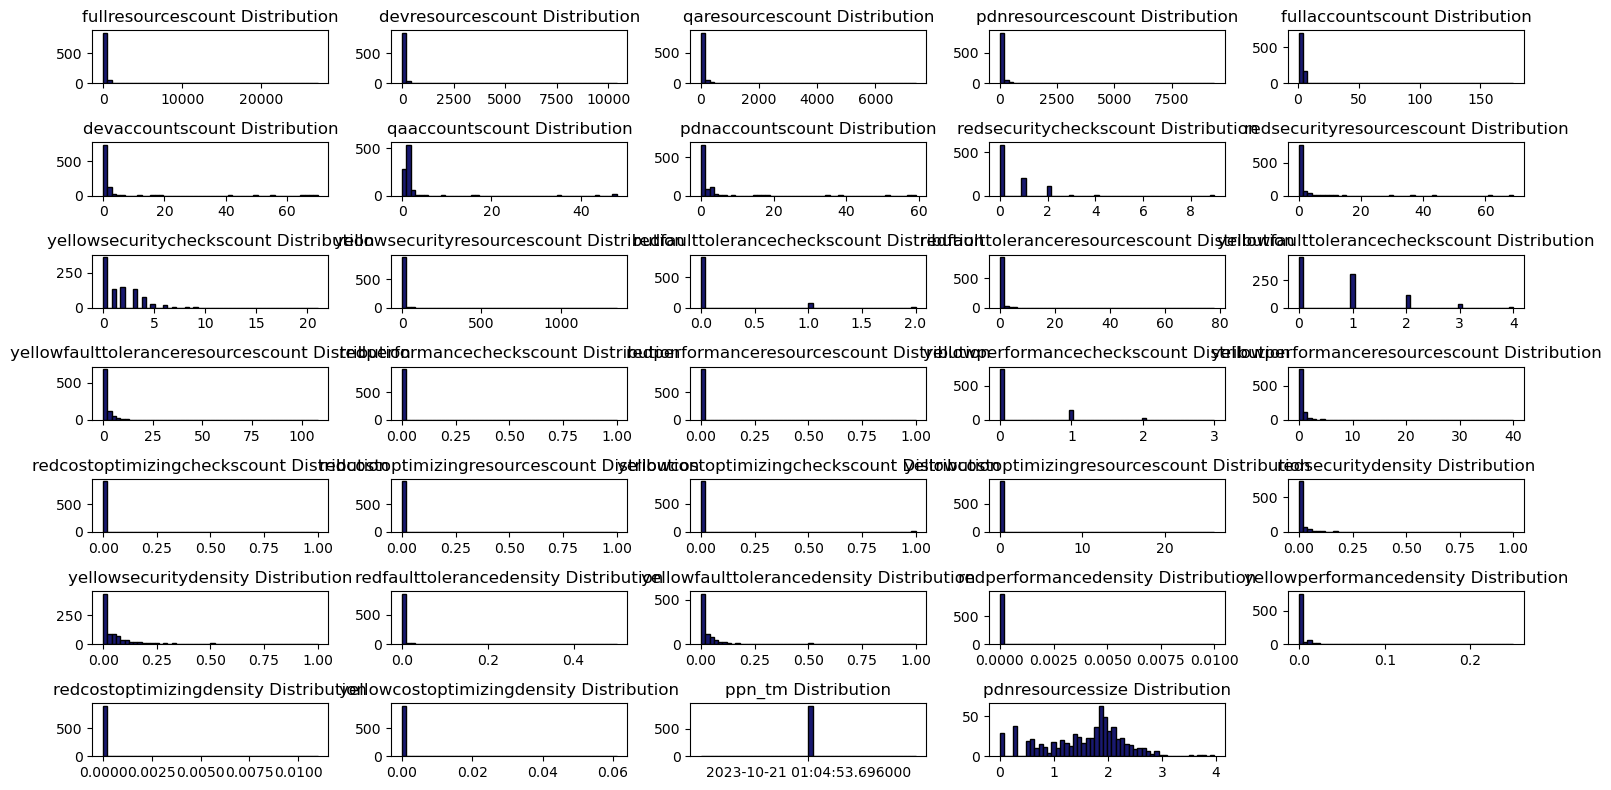

In [63]:
draw_histograms(df, df.columns[5:-1], 7, 5)

En general en los histogramas se evidencia que una buena cantidad de caracteristicas tienen valores iguales a cero o muy cercanos a cero. La variable `pdnresourcessize` presenta una distribución más uniforme que las demás.

### Conclusiones
Se cuenta con 37 columnas númericas, que pueden agruparse de la siguiente manera:
- **16** indican la cantidad de checks y recursos marcados por aplicación para cada pilar con su respectiva criticidad. Ejemplo: `redsecurityresourcescount` indica la cantidad de recursos con problemas de seguridad críticos; `redsecuritycheckscount` indica los diferentes problemas críticos de seguridad identificados en la aplicación.
- **4** variables indican el conteo de recursos en cada ambiente `pdnresourcescount`, `qaresourcescount`, `devresourcescount`. La variable `fullresourcescount` tiene la suma de los recursos en los tres ambientes.
- **4** variables indican el numero de cuentas o espacios isolados en nube en los que esta desplegada la aplicación. Las variables son `pdnaccountscount`, `qaaccountscount`, `devaccountscount`. La variable `fullaccountscount` tiene la suma de las cuentas donde esta la aplicación.
- **8** variables tienen la densidad de recursos marcados para cada pilar con su correspondiente criticidad (red o yellow). La densidad es la suma de los recursos marcados dividido el total de recursos. Ejemplo: `redsecuritydensity` es la densidad de recursos con problemas de seguridad críticos para una aplicación.
- La variable `pdnresourcessize` indica el tamaño de los recursos en el ambiente de producción. Esta variable es generada haciendo un logaritmo de la suma de los recursos en el ambiente de producción.
- Por último, las variables `application_id`, `organization_id`, `provider_id`, `snapshot_date_id` son identificadores de la aplicación, organización, proveedor y fecha de la información respectivamente.

Las 3 variables categoricas restantes son:
- `application_code`: código interno de la aplicación
- `ppn_tm`: fecha de captura de los datos
- `classification`: clasificación otorgada por un experto


# Preprocesamiento de datos

Para dar solución al problema de clusterización, primero acotamos el alcance, teniendo en cuenta solo aquellas aplicación en ambiente productivo. También se decide eliminar las variables categoricas y los conteos de recursos y cuentas en cada ambiente, ya que no aportan información relevante para el problema de clusterización. Por último, se eliminan las variables de densidad, ya que estas se pueden calcular a partir de los conteos de recursos marcados y los conteos de recursos totales.

In [92]:
# Se tiene el df con todos los campos disponibles --> 912 aplicaciones
# Seleccionamos solo las aplicaciones que tienen recursos en pdn
df_full_pdn = df[df['pdnresourcescount'] > 0]
len(df_full_pdn)

# Eliminamos las características asociadas a los conteos pues solo vamos a usar la característica con el log
features_a_eliminar = ['provider_id', 'snapshot_date_id',  'applicationcode',  'fullresourcescount',
                       'devresourcescount', 'qaresourcescount', 'pdnresourcescount', 'fullaccountscount',
                       'devaccountscount', 'qaaccountscount', 'pdnaccountscount', 'organization_id',
                       'ppn_tm', 'clasification'
                      ]
df_pdn = df_full_pdn.drop(features_a_eliminar, axis=1)


# Eliminamos application_id ya que es un identificador y no una característica que se deba incluir en el análisis
df_pdn = df_pdn.drop('application_id', axis=1)

df_pdn = df_pdn.filter(regex='^(?!.*density).*$')

features = df_pdn.columns.to_list()
len(features)

17

## Normalización
Para evitar los problemas asociados con la escala de los datos en los modelos de machine learning, se decide normalizar los datos. Para dejarlos en una escala de 0 a 1 y de está manera todas las caracteristicas tengan el mismo peso en el modelo a implementar. Las variables tienen escalas muy diferentes, algunas entre 0 y 1 y otras ascendiendo a 6000, por ejemplo. Esto de cara a la implementación del modelo puede generar problemas y afectar los resultados esperados

In [64]:
# normalicemos nuevamente los datos
minmax = MinMaxScaler()
df_pdn_scaled = minmax.fit_transform(df_pdn)

df_pdn_scaled = pd.DataFrame(df_pdn_scaled, columns=features)

In [67]:
# remove density features
features = features[:16] + features[-1:]

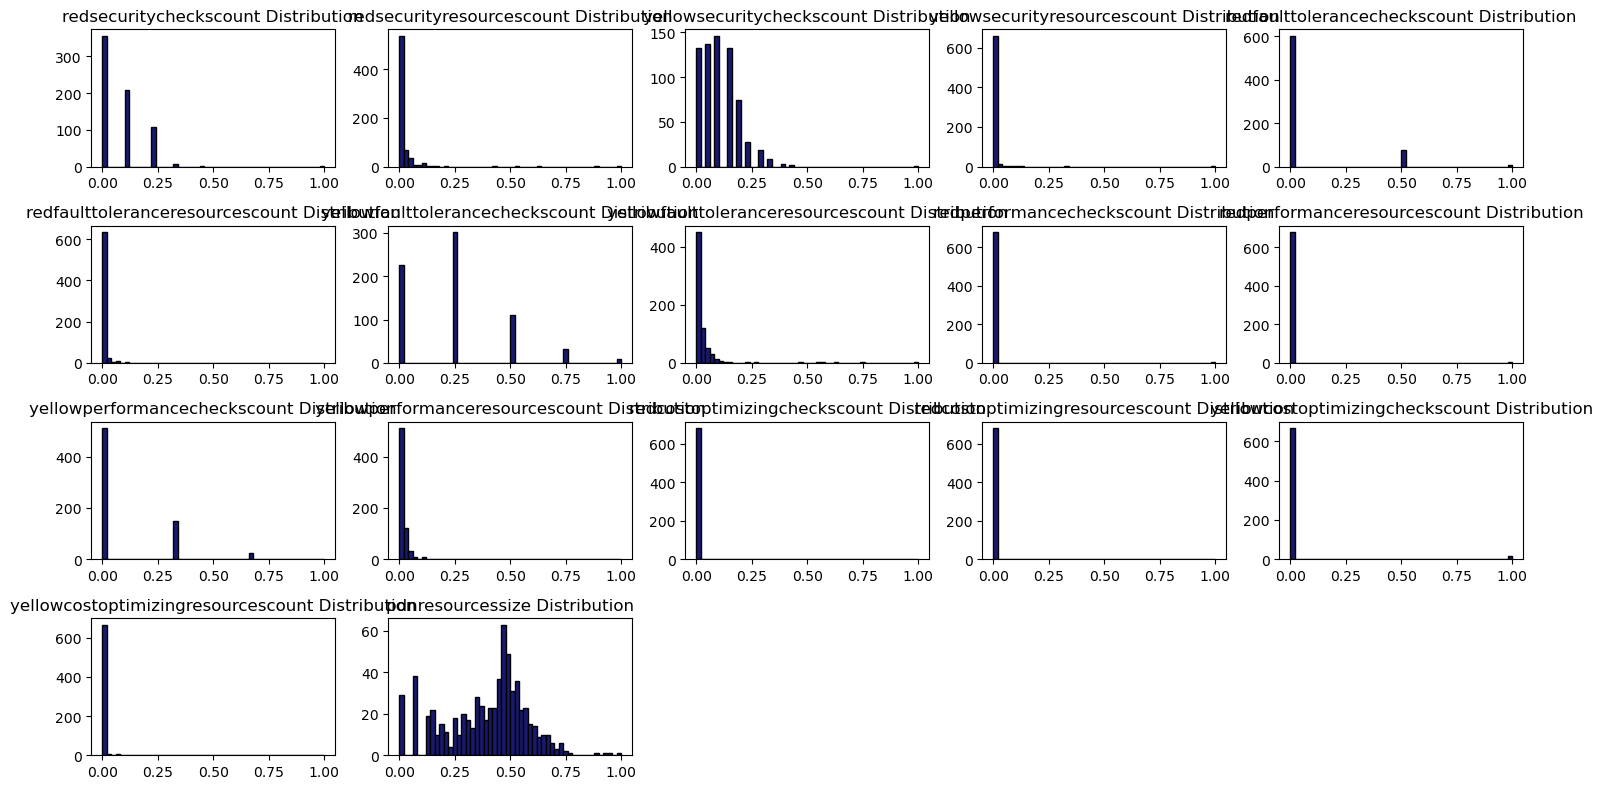

In [66]:
draw_histograms(df_pdn_scaled, features, 4, 5)

## Matriz de correlación

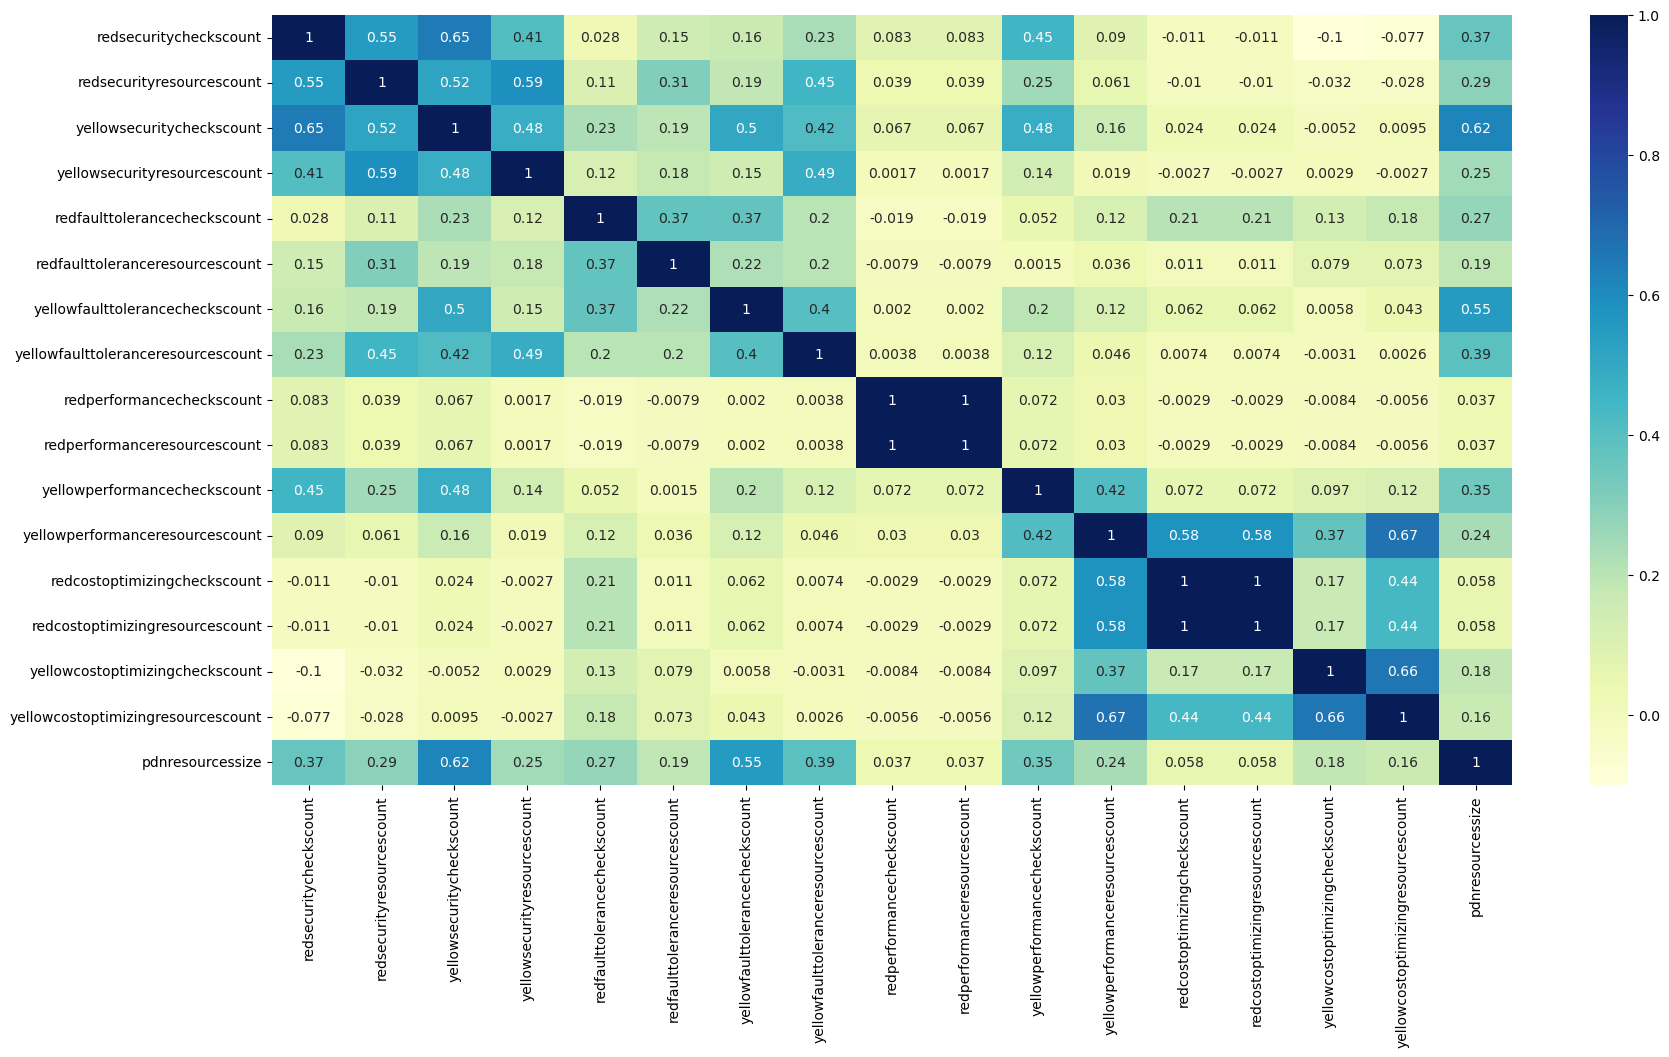

In [68]:
# heatmap of correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_pdn_scaled[features].corr(), annot=True, cmap="YlGnBu")
plt.show()

La matriz de correlación permite identificar las dependencias entre las diferentes variables del espacio muestral. Un correlación positiva indica que ambas variables se mueven en una misma dirección, esto quiere decir que mientras una aumenta la otra también aumenta, o de manera inversa, mientras una disminuye la otra también disminuye. Una correlación negativa indica que las variables se mueven en direcciones opuestas, es decir, mientras una aumenta la otra disminuye y viceversa. Una correlación cercana a cero indica que no existe relación entre las variables y por tanto son independientes.

Las variables `redcostoptimizingcheckscount` y `redcostoptimizingresourcescount` tienen una correlación de 1, lo que indica que estas variables son identicas. Esto ocurre porque estas dos caracteristicas corresponden a los problemas críticos de optimización de costos de una aplicación, y en este caso ninguna de las aplicaciones tiene este tipo de problemas por lo que ambas variables son iguales a cero para todas las muestras. Una situación similar ocurre con `redperformancecheckscount` y `redperformanceresourcecount`.

Mas allá de esto, se encuentran correlaciones variadas entre las diferentes caracteristicas. Ninguna supera el umbral de 0.7 que es utilizado para indicar una alta correlación positiva que pudiera inducir a la eliminación de variables redundantes.

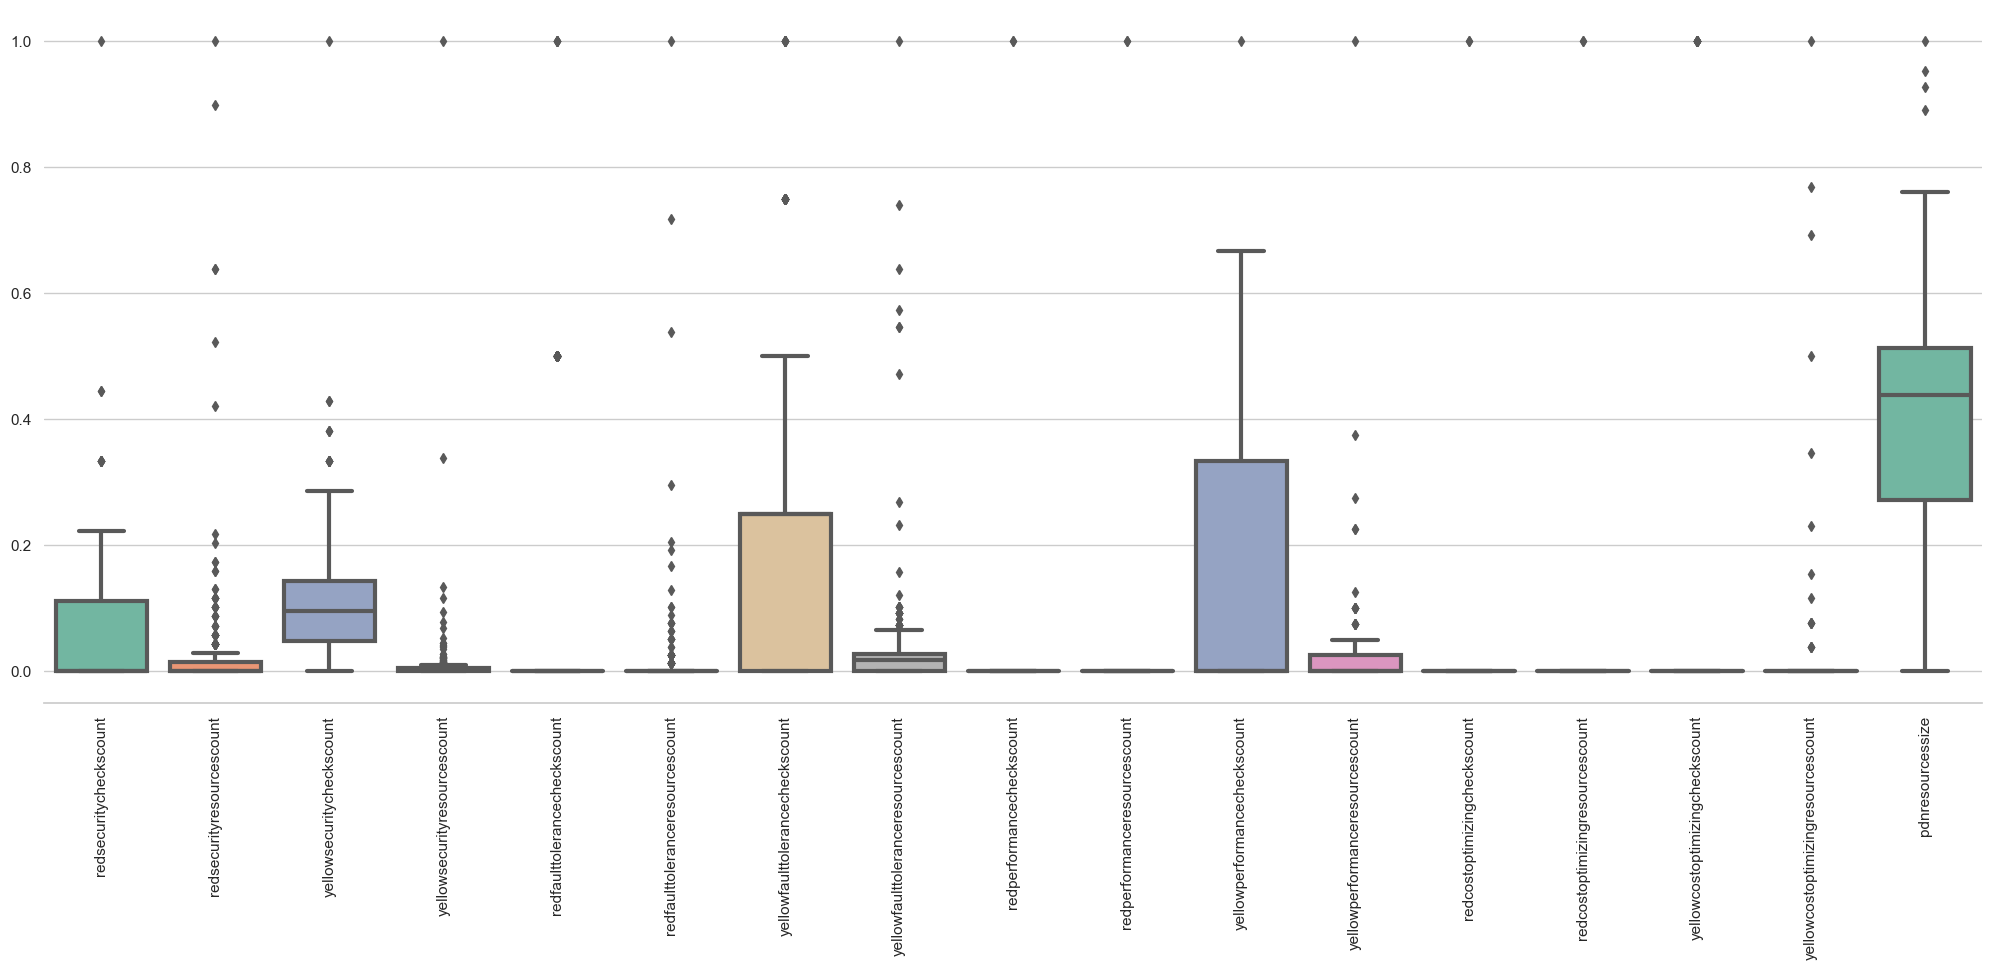

In [85]:
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = df_pdn_scaled[features], linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
plt.xticks(rotation=90) # Rotación de los valores del eje X
sns.despine(left=True)

Este gráfico es muy útil para visualizar los atípicos de cada variable y también permite identificar la distribución de los datos. Algunos atípicos de los encontrados aquí pueden ser seleccionados para ser eliminados de acuerdo con el contexto del problema. En este caso se decide mantener los atípicos dado que pueden aportar información valiosa en la clusterización. Por ejemplo, una aplicación con muchos recursos marcados en un pilar puede ser un indicador de que la aplicación debe ser intervenida de manera urgente.

## Extracción de características

Para la extracción de características se utilizo el metodo PCA (Análisis de Componentes Principales) que permite reducir la dimensionalidad de los datos, manteniendo la mayor cantidad de información posible. Este método se basa en la descomposición de valores singulares para encontrar una proyección de los datos en un espacio de menor dimensión.

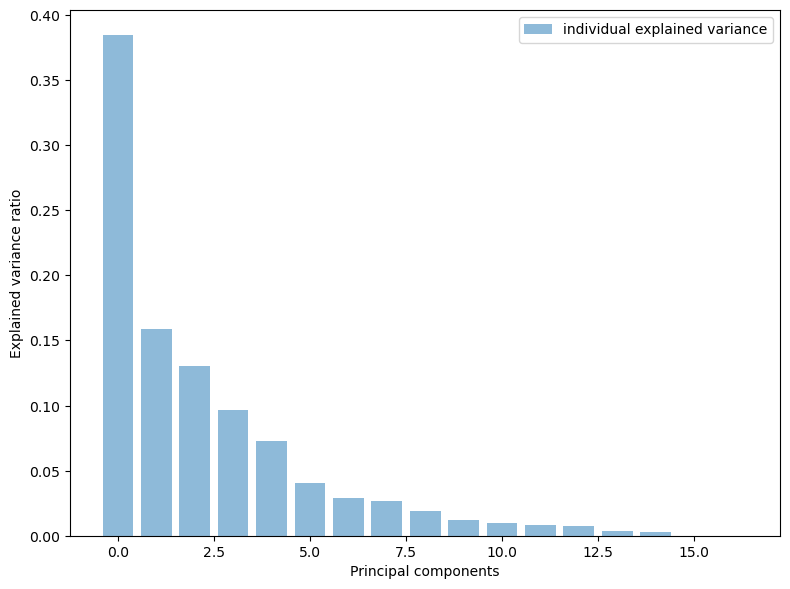

In [34]:
pca = PCA(n_components=df_pdn_scaled.shape[1])
principal_componets = pca.fit_transform(df_pdn_scaled)

variance_ratio = pca.explained_variance_ratio_

# plot the explained variance using a barplot
plt.figure(figsize=(8, 6))
plt.bar(range(df_pdn_scaled.shape[1]), variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

En este diagrama de barras se puede observar la varianza explicada por cada componente. Se puede observar que la primera componente explica el 40% de la varianza, la segunda explica el 15% y la tercera aproximadamente 12%. Esto quiere decir que solo con las primeras 3 componentes principales podemos explicar el 67% de la varianza de los datos.

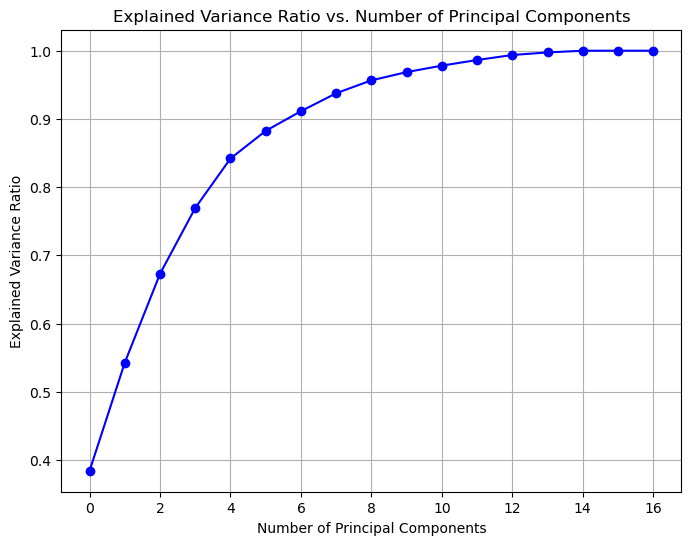

In [35]:
# plot pca
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

Este gráfico de varianza acumulada permite observar como va aumentando la explicación de la varianza a medida que aumentan los nuevos componentes. Si se utilizaran los mismos componentes del espacio original (17), entonces la varianza explicada sería del 100%. En este caso podemos ver que con 9 componentes podemos representar aproximadamente el 95% de la varianza de los datos.

In [77]:
Importancia_Componentes = pd.DataFrame(pca.explained_variance_ratio_)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 1 componentes: ", format(100*Importancia_Componentes.loc[:,0:0].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 2 componentes: ", format(100*Importancia_Componentes.loc[:,0:1].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes.loc[:,0:6].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 8 componentes: ", format(100*Importancia_Componentes.loc[:,0:7].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 9 componentes: ", format(100*Importancia_Componentes.loc[:,0:8].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 10 componentes: ", format(100*Importancia_Componentes.loc[:,0:9].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 11 componentes: ", format(100*Importancia_Componentes.loc[:,0:10].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 12 componentes: ", format(100*Importancia_Componentes.loc[:,0:11].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 13 componentes: ", format(100*Importancia_Componentes.loc[:,0:12].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 14 componentes: ", format(100*Importancia_Componentes.loc[:,0:13].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 15 componentes: ", format(100*Importancia_Componentes.loc[:,0:14].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 1 componentes:  [38.43169911]
Porcentaje de Varianza detectada para las primeras 2 componentes:  [54.28547141]
Porcentaje de Varianza detectada para las primeras 3 componentes:  [67.30375669]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [76.95322841]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [84.20492315]
Porcentaje de Varianza detectada para las primeras 6 componentes:  [88.25129828]
Porcentaje de Varianza detectada para las primeras 7 componentes:  [91.13530386]
Porcentaje de Varianza detectada para las primeras 8 componentes:  [93.76554049]
Porcentaje de Varianza detectada para las primeras 9 componentes:  [95.65686291]
Porcentaje de Varianza detectada para las primeras 10 componentes:  [96.86422987]
Porcentaje de Varianza detectada para las primeras 11 componentes:  [97.81448459]
Porcentaje de Varianza detectada para las primeras 12 componentes:  [98.63835783]
Porcentaje de Varianza de

Decidimos entonces utilizar 9 componentes para el nuevo espacio dimensional. Podemos llamar la función `PCA` de scikit learn con la varianza explicada que esperamos obtener y el método se encarga de calcular el número de componentes necesarios para obtener esa varianza.

In [78]:
# aplicar pca con la varianza obtenida anteriormente
selected_components = 9 # 95%

explained_variance_rate = np.sum(pca.explained_variance_ratio_[0:selected_components])

final_pca = PCA(explained_variance_rate)

principal_componets = final_pca.fit_transform(df_pdn_scaled)

print(f"Tamaño de los datos originales: {df_pdn_scaled.shape}")
print(f"Tamaño de los datos reducidos: {principal_componets.shape}")
print(f"Porcentaje de varianza explicada con las componentes seleccionadas {explained_variance_rate:.2%}")

Tamaño de los datos originales: (682, 17)
Tamaño de los datos reducidos: (682, 9)
Porcentaje de varianza explicada con las componentes seleccionadas 95.66%


En el siguiente gráfico de reconstrucción se proyectan los datos nuevamente en el espacio de dimensiones originales y se compara con los datos en el espacio dimensional reducido. Aquí se puede observar como se mantiene la distribución y varianza de los datos entre los dos espacios dimensionales. Esto es útil para garantizar que con los nuevos componentes podemos representar correctamente el espacio de datos original.

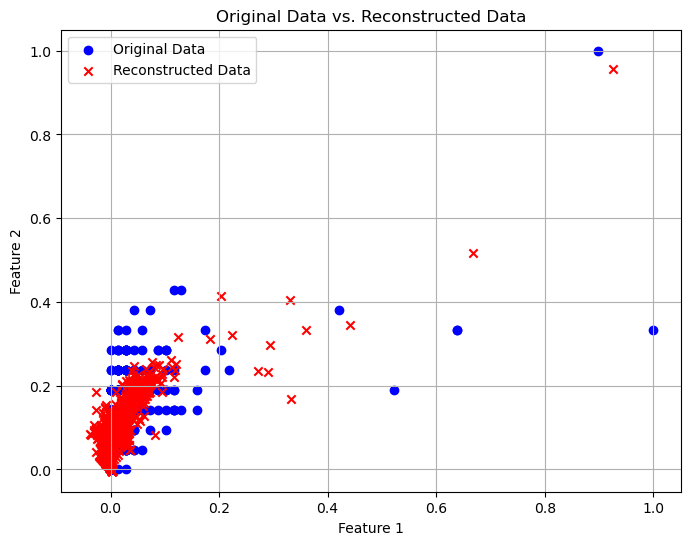

In [38]:
# reconstruction plot
reconstructed_data = final_pca.inverse_transform(principal_componets)

# Create a scatter plot of the original and reconstructed data
plt.figure(figsize=(8, 6))
plt.scatter(df_pdn_scaled.iloc[:, 1], df_pdn_scaled.iloc[:, 2], label='Original Data', marker='o', color='b')
plt.scatter(reconstructed_data[:, 1], reconstructed_data[:, 2], label='Reconstructed Data', marker='x', color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data vs. Reconstructed Data')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# convert array resulting of pca in dataframe with name of principal components
columns = [f"PC{i}" for i in range(1, principal_componets.shape[1] + 1)]
df_pca = pd.DataFrame(principal_componets, columns=columns)

c:\Users\fede_\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


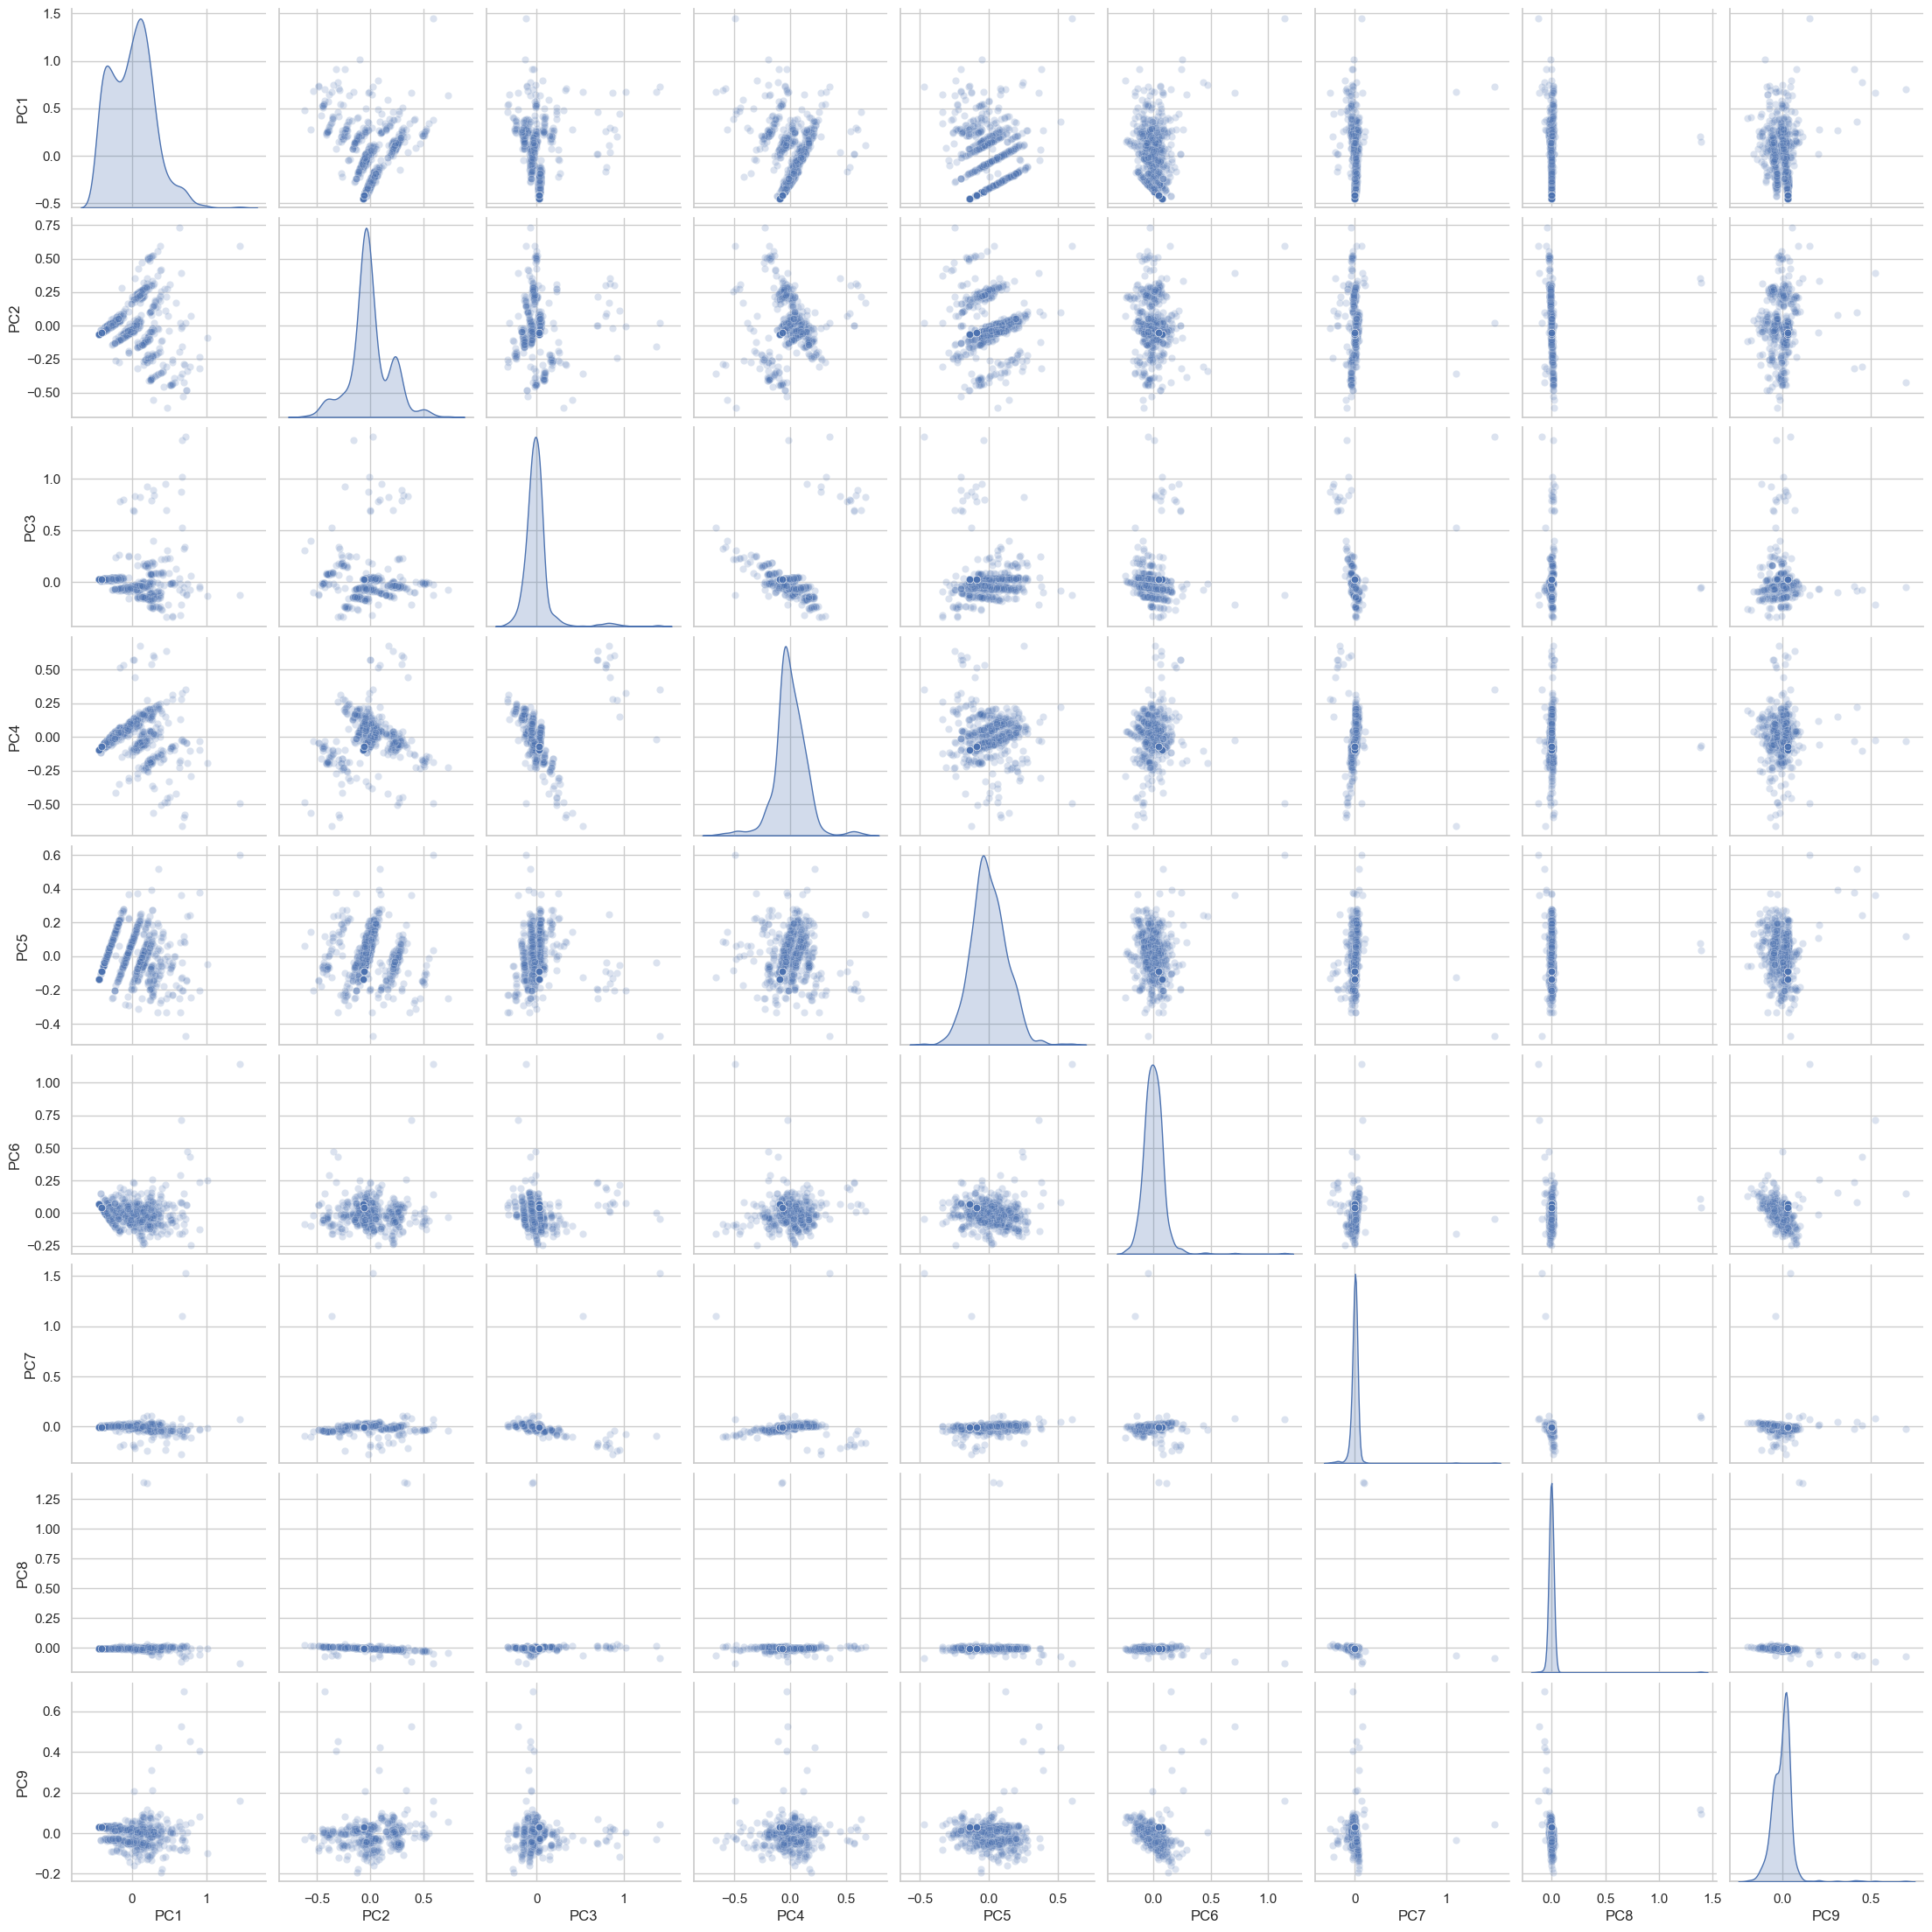

In [81]:
sns.pairplot(df_pca, diag_kind='kde', plot_kws={'alpha': 0.2})

Por último, en el diagrama de dispersión podemos observar como se distribuyen los datos en el nuevo espacio dimensional. Puede notarse inicialmente algunos cumulos de datos, pero hay cierta dispersión entre ellos que puede ser aprovechada por el algoritmo de clusterización. Por ejemplo, en el diagrama de dispersión entre PC2 y PC5 pueden vislumbrarse 4 grupos de datos formados.

C:\Users\fede_\AppData\Local\Temp\ipykernel_12768\426241150.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_pca, x='PC2', y='PC5', palette='Set2')


<Axes: xlabel='PC2', ylabel='PC5'>

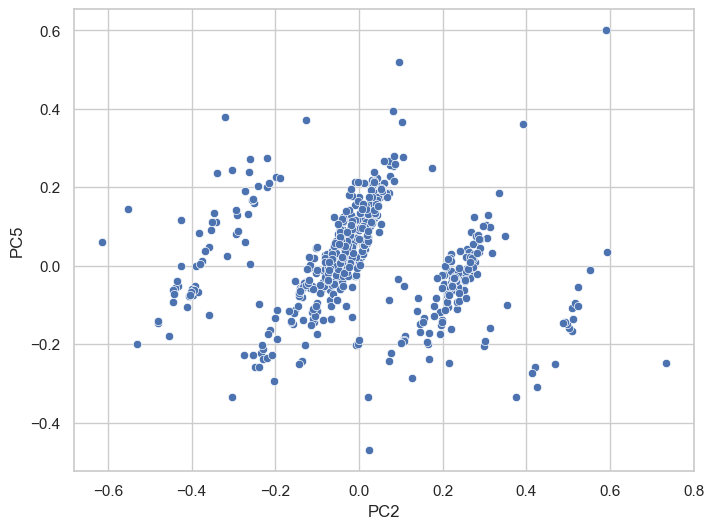

In [88]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC2', y='PC5', palette='Set2')

In [41]:
# save file
df_pca.to_csv("data/fact_application_v3.csv", index=False)